In [64]:
import numpy as np
import pandas as pd
import gzip
import shutil
import matplotlib.pyplot as plt
import os

In [70]:
!rm -r data

In [67]:
!mkdir -p data/interim

In [68]:
!plink2 \
  --vcf /datasets/dsc180a-wi20-public/Genome/vcf/sample/chr22_test.vcf.gz \
  --make-bed \
  --snps-only \
  --maf 0.09 \
  --geno 0.05 \
  --mind 0.1 \
  --recode \
  --out data/interim/sample-chr22

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/interim/sample-chr22.log.
Options in effect:
  --geno 0.05
  --maf 0.09
  --make-bed
  --mind 0.1
  --out data/interim/sample-chr22
  --recode
  --snps-only
  --vcf /home/e5jiang/../../datasets/dsc180a-wi20-public/Genome/vcf/sample/chr22_test.vcf.gz

257664 MB RAM detected; reserving 128832 MB for main workspace.
--vcf: data/interim/sample-chr22-temporary.bed +
data/interim/sample-chr22-temporary.bim +
data/interim/sample-chr22-temporary.fam written.
25078 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/interim/sample-chr22.nosex .
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele fr

In [50]:
!plink2 --bfile data/interim/sample-chr22 --pca 2 --out data/pca-results/sample-pca

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/pca-results/sample-pca.log.
Options in effect:
  --bfile data/interim/sample-chr22
  --out data/pca-results/sample-pca
  --pca 2

257664 MB RAM detected; reserving 128832 MB for main workspace.
2032 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data/pca-results/sample-pca.nosex .
Using up to 39 threads (change this with --threads).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
2032 variants and 2548 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete

In [51]:
vectors = pd.read_csv('data/pca-results/sample-pca.eigenvec', delimiter=' ', names=['loc1','loc2','x','y'])

,loc1,loc2,x,y
0,HG00096,HG00096,0.009630,0.001997
1,HG00097,HG00097,-0.050370,-0.017236
2,HG00099,HG00099,0.016661,0.006687
3,HG00100,HG00100,0.012869,0.008217
4,HG00101,HG00101,0.014282,-0.005441
5,HG00102,HG00102,0.014007,0.005911
6,HG00103,HG00103,-0.014249,-0.007758
7,HG00104,HG00104,0.011463,0.012295
8,HG00105,HG00105,0.008508,0.012638
9,HG00106,HG00106,0.008377,-0.004116


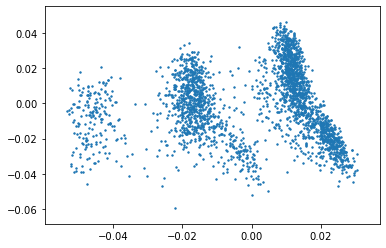

In [52]:
plt.scatter(vectors['x'], vectors['y'], s=2)
plt.savefig('pca.jpg')

In [57]:
os.system('./a2.sh')

0

In [32]:
!bwa index data/test-data/SP1.fq

[bwa_index] Pack FASTA... 0.07 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.07 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.04 sec
[bwa_index] Construct SA from BWT and Occ... 0.05 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index data/test-data/SP1.fq
[main] Real time: 0.288 sec; CPU: 0.240 sec


In [29]:
!bwa mem data/test-data/SP1.fq


Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]

Algorithm options:

       -t INT        number of threads [1]
       -k INT        minimum seed length [19]
       -w INT        band width for banded alignment [100]
       -d INT        off-diagonal X-dropoff [100]
       -r FLOAT      look for internal seeds inside a seed longer than {-k} * FLOAT [1.5]
       -y INT        seed occurrence for the 3rd round seeding [20]
       -c INT        skip seeds with more than INT occurrences [500]
       -D FLOAT      drop chains shorter than FLOAT fraction of the longest overlapping chain [0.50]
       -W INT        discard a chain if seeded bases shorter than INT [0]
       -m INT        perform at most INT rounds of mate rescues for each read [50]
       -S            skip mate rescue
       -P            skip pairing; mate rescue performed unless -S also in use

Scoring options:

       -A INT        score for a sequence match, which scales options -TdBOELU unless overridden [1]
     

In [47]:
!gatk MergeVcfs \
-I ~/../../datasets/dsc180a-wi20-public/Genome/vcf/sample/ \
-I ~/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz \
-O output.vcf.gz

Using GATK jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar MergeVcfs --INPUT /home/e5jiang/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr1.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz /home/e5jiang/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr2.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz --OUTPUT output.vcf.gz
USAGE: MergeVcfs [arguments]

<p>Combines multiple variant files into a single variant file.</p><h3>Inputs</h3><ul>      <li>One or more input file in
VCF format (can be gzipped, i.e. ending in ".vcf.gz", or binary compressed, i.e. ending in ".bcf").</li>     
<li>Optionally a sequence dictionary file (typically name ending in .dict) if the input VCF does not contain a         
complete contig list and if the output in